<a href="https://colab.research.google.com/github/veronica1013/marketing_analysis_carrefour_kenya/blob/main/Moringa_Data_Science_Core_Module3_W3_Independent_Project_2021_10_Veronica_Isiaho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Market Analysis-Carrefour Kenya

## 1. Overview

Carrefour is a French multinational retail corporation headquartered in Massy, France. The eighth-largest retailer in the world by revenue, it operates a chain of hypermarkets, groceries and convenience stores, which as of January 2021, comprises its 12,225 stores in over 30 countries (Wikipedia).

In Kenya, Carrefour has 8 outlets mostly located in the suburbs of Kenya's capital city, Nairobi. The retailer's expansion into Kenya has benefited from the failure of previously-dominant supermarket chains such as Nakumatt and Uchumi as Carrefour rushed in to occupy the retail spaces and market share they vacated.

## 1.1 Research Question

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

## 1.2 Objectives

####1. Dimentionality reduction
Reducing the dataset to a low dimensional dataset using the t-SNE algorithm or PCA, perform analysis and provide insights gained from your analysis.

####2. Feature selection
Perform feature selection through the use of the unsupervised learning methods,perform analysis and provide insights on the features that contribute the most information to the dataset.

####3. Basket of goods association analysis
Create association rules that will allow us to identify relationships between variables in the dataset.

####4. Annomaly detection
Check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.

## 1.3 Research design

1. Overview
2. Data review
3. Data cleaning
4. Data analysis
5. Dimentionality reduction
6. Feature Selection
7. Association rules
8. Annomaly detection
9. Conclusion

## 2. Loading the R Packages

In [4]:
# Loading the R extension
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R  
#Installing the relevant R libraries
install.packages("e1071")
install.packages("factoextra")
install.packages("devtools")

install.packages("Rtsne")

library(Rtsne)
install.packages('VIM')
install.packages('CatEncoders')

#Installing and loading our caret package

install.packages("caret")
library(caret)

#Installing and loading the corrplot package for plotting

install.packages("corrplot")
library(corrplot)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘proxy’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/proxy_0.4-26.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 116286 bytes (113 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

In [30]:
%%R
# Loading the libraries
library(dplyr)
library(readr)
library(data.table)

library(e1071)
library(magrittr)
library(knitr)
library(tidyverse)

library(factoextra)
library(devtools)
install.packages("Hmisc")
library(Hmisc)
library(corrplot)
library(CatEncoders)

# library(CatEncoders)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘htmlTable’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/htmlTable_2.2.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 422456 bytes (412 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [6]:
%%R
# setting up the enviroment
getwd()

# locating the dataset from the file path /content/Supermarket_Dataset_1 - Sales Data.csv
setwd("//content")

#Loading the first dataset
df_1 <- read.csv("Supermarket_Dataset_1 - Sales Data.csv",TRUE,",")

## 2.1 Previewing the data

In [7]:
%%R
#Preview the top of the dataset
head(df_1)

   Invoice.ID Branch Customer.type Gender           Product.line Unit.price
1 750-67-8428      A        Member Female      Health and beauty      74.69
2 226-31-3081      C        Normal Female Electronic accessories      15.28
3 631-41-3108      A        Normal   Male     Home and lifestyle      46.33
4 123-19-1176      A        Member   Male      Health and beauty      58.22
5 373-73-7910      A        Normal   Male      Sports and travel      86.31
6 699-14-3026      C        Normal   Male Electronic accessories      85.39
  Quantity     Tax      Date  Time     Payment   cogs gross.margin.percentage
1        7 26.1415  1/5/2019 13:08     Ewallet 522.83                4.761905
2        5  3.8200  3/8/2019 10:29        Cash  76.40                4.761905
3        7 16.2155  3/3/2019 13:23 Credit card 324.31                4.761905
4        8 23.2880 1/27/2019 20:33     Ewallet 465.76                4.761905
5        7 30.2085  2/8/2019 10:37     Ewallet 604.17                4.761905


In [8]:
%%R
#Preview the tail of the dataset
tail(df_1)

      Invoice.ID Branch Customer.type Gender           Product.line Unit.price
995  652-49-6720      C        Member Female Electronic accessories      60.95
996  233-67-5758      C        Normal   Male      Health and beauty      40.35
997  303-96-2227      B        Normal Female     Home and lifestyle      97.38
998  727-02-1313      A        Member   Male     Food and beverages      31.84
999  347-56-2442      A        Normal   Male     Home and lifestyle      65.82
1000 849-09-3807      A        Member Female    Fashion accessories      88.34
     Quantity     Tax      Date  Time Payment   cogs gross.margin.percentage
995         1  3.0475 2/18/2019 11:40 Ewallet  60.95                4.761905
996         1  2.0175 1/29/2019 13:46 Ewallet  40.35                4.761905
997        10 48.6900  3/2/2019 17:16 Ewallet 973.80                4.761905
998         1  1.5920  2/9/2019 13:22    Cash  31.84                4.761905
999         1  3.2910 2/22/2019 15:33    Cash  65.82          

## 2.3 Getting information about the dataset

In [ ]:
%%R
# Find the size  of the dataset
dim(df_1)

[1] 1000   16


The dataset has 1000 rows and 16 columns

In [10]:
%%R
# Get the Data types 
sapply(df_1, class)

             Invoice.ID                  Branch           Customer.type 
            "character"             "character"             "character" 
                 Gender            Product.line              Unit.price 
            "character"             "character"               "numeric" 
               Quantity                     Tax                    Date 
              "integer"               "numeric"             "character" 
                   Time                 Payment                    cogs 
            "character"             "character"               "numeric" 
gross.margin.percentage            gross.income                  Rating 
              "numeric"               "numeric"               "numeric" 
                  Total 
              "numeric" 


In [11]:
%%R
# The number of unique values for each variable.
df_1 %>% summarise_all(n_distinct)

  Invoice.ID Branch Customer.type Gender Product.line Unit.price Quantity Tax
1       1000      3             2      2            6        943       10 990
  Date Time Payment cogs gross.margin.percentage gross.income Rating Total
1   89  506       3  990                       1          990     61   990


In [24]:
%%R
# Check the duplicates 
duplicates <- table(duplicated.data.frame(df_1))
duplicates



FALSE 
 1000 


There are no duplicates

The are no duplicayes in the dataset.

In [27]:
%%R
#Check for missing values     
missing.values <- sum(is.na(df_1))
info <- "The missing values available in the dataframe are: "
cat(info, missing.values)

The missing values available in the dataframe are:  0

There are no mising values

In [34]:
%%R
# Check the datatypes
glimpse(df_1)

Rows: 1,000
Columns: 16
$ Invoice.ID              <chr> "750-67-8428", "226-31-3081", "631-41-3108", "…
$ Branch                  <chr> "A", "C", "A", "A", "A", "C", "A", "C", "A", "…
$ Customer.type           <chr> "Member", "Normal", "Normal", "Member", "Norma…
$ Gender                  <chr> "Female", "Female", "Male", "Male", "Male", "M…
$ Product.line            <chr> "Health and beauty", "Electronic accessories",…
$ Unit.price              <dbl> 74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.8…
$ Quantity                <int> 7, 5, 7, 8, 7, 7, 6, 10, 2, 3, 4, 4, 5, 10, 10…
$ Tax                     <dbl> 26.1415, 3.8200, 16.2155, 23.2880, 30.2085, 29…
$ Date                    <chr> "1/5/2019", "3/8/2019", "3/3/2019", "1/27/2019…
$ Time                    <chr> "13:08", "10:29", "13:23", "20:33", "10:37", "…
$ Payment                 <chr> "Ewallet", "Cash", "Credit card", "Ewallet", "…
$ cogs                    <dbl> 522.83, 76.40, 324.31, 465.76, 604.17, 597.73,…
$ gross.margin.p

In [35]:
%%R
# Selecting the numeric data
numerical.columns <- select_if(df_1, is.numeric)

#shape of numerical data
dim(numerical.columns)

[1] 1000    8


Only one column is in numeric instead of 8. I will change the datatypes to the required ones later

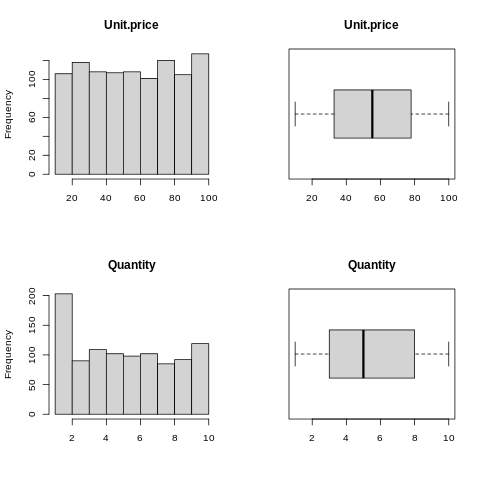

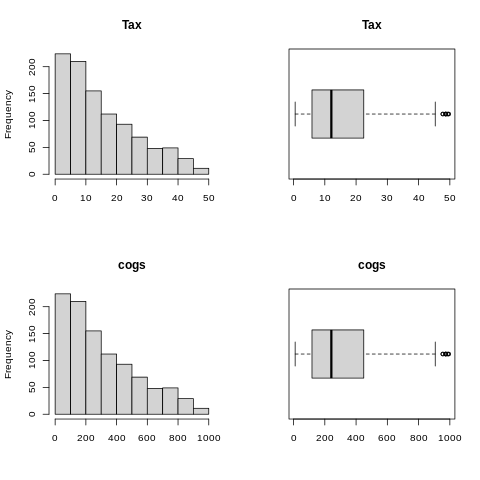

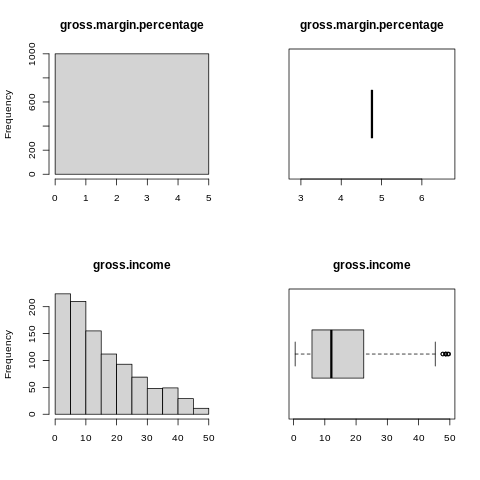

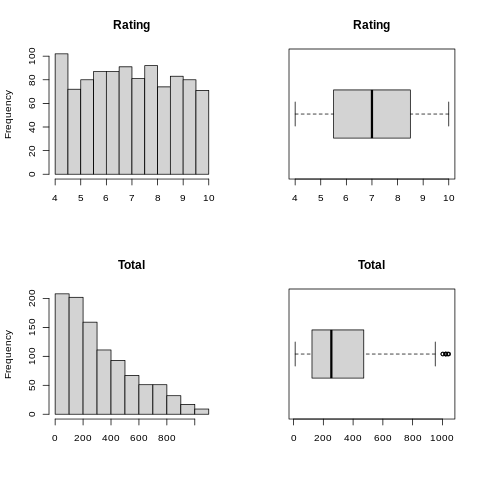

In [38]:
%%R
#Checking for outliers
par(mfrow = c(2,2))
 
for (g in 1:8){
    hist(numerical.columns[, g], main=names(numerical.columns)[g], xlab=NULL)
    boxplot(numerical.columns[,g], main=names(numerical.columns)[g], horizontal = TRUE, geom=c("boxplot", "jitter"),
            color=numerical.columns[,g])
}

## 3 Perform Exploratory Data Analysis

In [39]:
%%R
# Get the basic statistics
summary(df_1)

  Invoice.ID           Branch          Customer.type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product.line         Unit.price       Quantity          Tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

In [40]:
%%R
# Getting the descriptive statistics of the data
describe(df_1)

df_1 

 16  Variables      1000  Observations
--------------------------------------------------------------------------------
Invoice.ID 
       n  missing distinct 
    1000        0     1000 

lowest : 101-17-6199 101-81-4070 102-06-2002 102-77-2261 105-10-6182
highest: 894-41-5205 895-03-6665 895-66-0685 896-34-0956 898-04-2717
--------------------------------------------------------------------------------
Branch 
       n  missing distinct 
    1000        0        3 
                            
Value          A     B     C
Frequency    340   332   328
Proportion 0.340 0.332 0.328
--------------------------------------------------------------------------------
Customer.type 
       n  missing distinct 
    1000        0        2 
                        
Value      Member Normal
Frequency     501    499
Proportion  0.501  0.499
--------------------------------------------------------------------------------
Gender 
       n  missing distinct 
    1000        0        2 
        

In [41]:
%%R
# Barplot for the character Variables
# First Create a dataframe for the character variables only
character.variables <-df_1 %>%
  select(c(2,3,4, 5, 11))


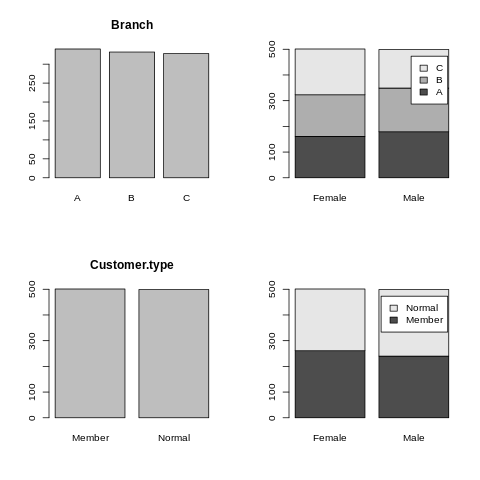

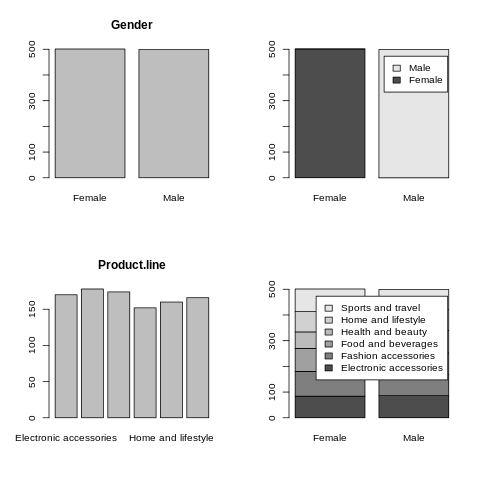

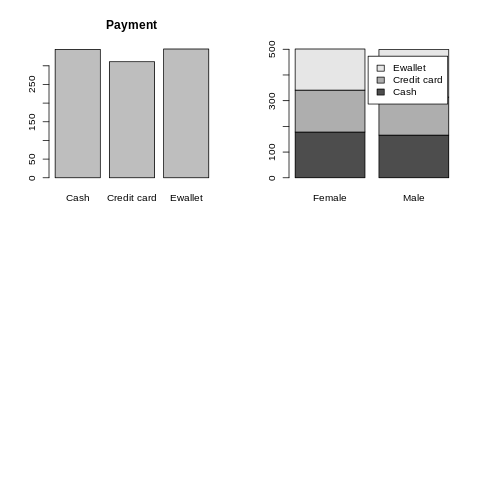

In [62]:
%%R
par(mfrow = c(2,2))

# Loop through the the columns
specific <- names(character.variables) 
for (i in 1:5){
     
  # Plot histogram for character variables
  specific.table <- table(character.variables[,i])
  barplot(specific.table, main = names(character.variables)[i], xlab = NULL)
  specific.table2 <- table(character.variables[,i], df_1$Gender)
  barplot(specific.table2, legend = rownames(specific.table2), right=TRUE)
}



In [67]:
%%R
# Find the standard deviation of the numerical data
info1 <- "The standard deviation for the numeric columns are:\n"
cat(paste(info1))
print(sapply(numerical.columns[1:8], sd))

# Find the variance of the numerical data
info2 <- "The variance for the numeric columns are:\n"
cat(paste(info2))
print(sapply(numerical.columns[1:8], var))

#  Find the mean of the numerical data
info7 <- "The mean for the numeric columns are:\n"
cat(paste(info7))
print(sapply(numerical.columns[1:8], mean))

# Finding the Quartiles
info8 <- "The quantiles for the numeric columns are:\n"
cat(paste(info8))
print(sapply(numerical.columns[1:8], quantile))

# Find the Interquartile Range
info3 <- "The interquartile range for the numeric columns are:\n"
cat(paste(info3))
sapply(numerical.columns[1:8], IQR)

The standard deviation for the numeric columns are:
             Unit.price                Quantity                     Tax 
              26.494628                2.923431               11.708825 
                   cogs gross.margin.percentage            gross.income 
             234.176510                0.000000               11.708825 
                 Rating                   Total 
               1.718580              245.885335 
The variance for the numeric columns are:
             Unit.price                Quantity                     Tax 
             701.965331                8.546446              137.096594 
                   cogs gross.margin.percentage            gross.income 
           54838.637658                0.000000              137.096594 
                 Rating                   Total 
               2.953518            60459.598018 
The mean for the numeric columns are:
             Unit.price                Quantity                     Tax 
              5

In [66]:
%%R
# Find the max, min and Range for the numerical columns
info4 <- "The minimum values for the numeric columns are:\n"
cat(paste(info4))
min <- sapply(numerical.columns[1:8], min)
print(min)
info5 <- "\nThe maximum values for the numeric columns are:\n"
cat(paste(info5))
max <- sapply(numerical.columns[1:8], max)
print(max)
info6 <- "\nThe range for the numeric columns are:\n"
cat(paste(info6))
range = max - min
print(range)

The minimum values for the numeric columns are:
             Unit.price                Quantity                     Tax 
              10.080000                1.000000                0.508500 
                   cogs gross.margin.percentage            gross.income 
              10.170000                4.761905                0.508500 
                 Rating                   Total 
               4.000000               10.678500 

The maximum values for the numeric columns are:
             Unit.price                Quantity                     Tax 
              99.960000               10.000000               49.650000 
                   cogs gross.margin.percentage            gross.income 
             993.000000                4.761905               49.650000 
                 Rating                   Total 
              10.000000             1042.650000 

The range for the numeric columns are:
             Unit.price                Quantity                     Tax 
          

### Find the Skewness and Kurtosis
#### Skewness
1. If skewness is less than −1 or greater than +1, the distribution is highly skewed.
2. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
3. If skewness is between −½ and +½, the distribution is approximately symmetric.

#### Kurtosis
Data that follows a mesokurtic distribution shows an excess kurtosis of zero or close to zero. This means that if the data follows a normal distribution, it follows a mesokurtic distribution. Leptokurtic indicates a positive excess kurtosis. The leptokurtic distribution shows heavy tails on either side, indicating large outliers. A platykurtic distribution shows a negative excess kurtosis. The kurtosis reveals a distribution with flat tails. The flat tails indicate the small outliers in a distribution.

In [69]:
%%R
# Find the kurtosis and skewness of the data
desc_stats <- data.frame(
  skew = apply(numerical.columns,2, skewness),
  Kurt = apply(numerical.columns,2, kurtosis)
)
stat <- round(desc_stats,1)
stat

                        skew Kurt
Unit.price               0.0 -1.2
Quantity                 0.0 -1.2
Tax                      0.9 -0.1
cogs                     0.9 -0.1
gross.margin.percentage  NaN  NaN
gross.income             0.9 -0.1
Rating                   0.0 -1.2
Total                    0.9 -0.1


In [73]:
%%R
# Find the covariance matrix
cat("Covariance Matrix of the Numerical Variables:\n")
X <- cov(numerical.columns[1:8])
print(X)

Covariance Matrix of the Numerical Variables:
                          Unit.price     Quantity          Tax        cogs
Unit.price               701.9653313   0.83477848  196.6683401  3933.36680
Quantity                   0.8347785   8.54644645   24.1495704   482.99141
Tax                      196.6683401  24.14957038  137.0965941  2741.93188
cogs                    3933.3668019 482.99140761 2741.9318829 54838.63766
gross.margin.percentage    0.0000000   0.00000000    0.0000000     0.00000
gross.income             196.6683401  24.14957038  137.0965941  2741.93188
Rating                    -0.3996675  -0.07945646   -0.7333003   -14.66601
Total                   4130.0351420 507.14097799 2879.0284770 57580.56954
                        gross.margin.percentage gross.income       Rating
Unit.price                                    0  196.6683401  -0.39966752
Quantity                                      0   24.1495704  -0.07945646
Tax                                           0  137.0965

In [75]:
%%R
# Using function cov2cor()
# To convert covariance matrix to correlation matrix
cat("The Correlation Matrix:\n")
print(cov2cor(X))

The Correlation Matrix:
                          Unit.price    Quantity        Tax       cogs
Unit.price               1.000000000  0.01077756  0.6339621  0.6339621
Quantity                 0.010777564  1.00000000  0.7055102  0.7055102
Tax                      0.633962089  0.70551019  1.0000000  1.0000000
cogs                     0.633962089  0.70551019  1.0000000  1.0000000
gross.margin.percentage          NaN         NaN        NaN        NaN
gross.income             0.633962089  0.70551019  1.0000000  1.0000000
Rating                  -0.008777507 -0.01581490 -0.0364417 -0.0364417
Total                    0.633962089  0.70551019  1.0000000  1.0000000
                        gross.margin.percentage gross.income       Rating
Unit.price                                  NaN    0.6339621 -0.008777507
Quantity                                    NaN    0.7055102 -0.015814905
Tax                                         NaN    1.0000000 -0.036441705
cogs                                     

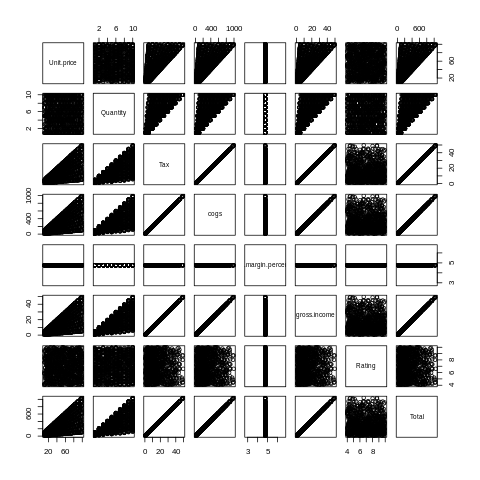

In [70]:
%%R
# Find the correlation 

pairs(numerical.columns)

In [ ]:
%%R
# Pearson Correaltion.
cor(supr_cont, method = "pearson", use = "complete.obs")

               Unit.price    Quantity        Tax       cogs gross.income
Unit.price    1.000000000  0.01077756  0.6339621  0.6339621    0.6339621
Quantity      0.010777564  1.00000000  0.7055102  0.7055102    0.7055102
Tax           0.633962089  0.70551019  1.0000000  1.0000000    1.0000000
cogs          0.633962089  0.70551019  1.0000000  1.0000000    1.0000000
gross.income  0.633962089  0.70551019  1.0000000  1.0000000    1.0000000
Rating       -0.008777507 -0.01581490 -0.0364417 -0.0364417   -0.0364417
Total         0.633962089  0.70551019  1.0000000  1.0000000    1.0000000
                   Rating      Total
Unit.price   -0.008777507  0.6339621
Quantity     -0.015814905  0.7055102
Tax          -0.036441705  1.0000000
cogs         -0.036441705  1.0000000
gross.income -0.036441705  1.0000000
Rating        1.000000000 -0.0364417
Total        -0.036441705  1.0000000


There is a lot of strong positive correlations among outr data variables with ratings being the only variable that us negatively correlated to all the other variables.

### Label encoding the categorical data

In [ ]:
%%R
supermarket1 <- supermarket
#Branch
lab_br = LabelEncoder.fit(supermarket1[,'Branch'])
supermarket1$Branch = transform(lab_br, supermarket1[,'Branch'])

# Customer.type
lab_ct = LabelEncoder.fit(supermarket1[,'Customer.type'])
supermarket1$Customer.type = transform(lab_ct, supermarket1[,'Customer.type'])

# Gender
lab_gen = LabelEncoder.fit(supermarket1[,'Gender'])
supermarket1$Gender = transform(lab_gen, supermarket1[,'Gender'])

# Product.line
lab_gen = LabelEncoder.fit(supermarket1[,'Product.line'])
supermarket1$Product.line = transform(lab_gen, supermarket1[,'Product.line'])

# Payment
lab_pay = LabelEncoder.fit(supermarket1[,'Payment'])
supermarket1$Payment = transform(lab_pay, supermarket1[,'Payment'])


#Preview the data
head(supermarket1)

   Invoice.ID Branch Customer.type Gender Product.line Unit.price Quantity
1 750-67-8428      1             1      1            4      74.69        7
2 226-31-3081      3             2      1            1      15.28        5
3 631-41-3108      1             2      2            5      46.33        7
4 123-19-1176      1             1      2            4      58.22        8
5 373-73-7910      1             2      2            6      86.31        7
6 699-14-3026      3             2      2            1      85.39        7
      Tax      Date  Time Payment   cogs gross.margin.percentage gross.income
1 26.1415  1/5/2019 13:08       3 522.83                4.761905      26.1415
2  3.8200  3/8/2019 10:29       1  76.40                4.761905       3.8200
3 16.2155  3/3/2019 13:23       2 324.31                4.761905      16.2155
4 23.2880 1/27/2019 20:33       3 465.76                4.761905      23.2880
5 30.2085  2/8/2019 10:37       3 604.17                4.761905      30.2085
6 29.88

In [ ]:
%%R
## locale-specific version of the date
format(Sys.Date(), "%a %b %d")

# change date column to be in the date/time class
supermarket$Date <- as.Date(supermarket$Date, "%m/%d/%y")

#Data types of the variavbles

sapply(supermarket, class)

             Invoice.ID                  Branch           Customer.type 
            "character"               "integer"               "integer" 
                 Gender            Product.line              Unit.price 
              "integer"               "integer"               "numeric" 
               Quantity                     Tax                    Date 
              "integer"               "numeric"                  "Date" 
                   Time                 Payment                    cogs 
            "character"               "integer"               "numeric" 
gross.margin.percentage            gross.income                  Rating 
              "numeric"               "numeric"               "numeric" 
                  Total 
              "numeric" 


#  Dimensionality Reduction

## PCA

PCA reduces the dimensions of a highly ranked matrix into a lower ranked matrix which captures the essence of the original data by showing maximum variations in the dataset (by focusing on variables that are actually differentiating between the data).

Since categorical variables don’t belong on a coordinate plane, we do not apply PCA to them.

In [ ]:
%%R

market <- supermarket
# Since total obtained by tax + Quantity*Unit.price wedrop the total column
market$Total <- NULL
# #Drop gross.margin.percentage column since it has only one value in all rows
market$gross.margin.percentage <- NULL


market <- select_if(market, is.numeric)


#Preview the scaled data
tail(market)


     Unit.price Quantity     Tax   cogs gross.income Rating
995       60.95        1  3.0475  60.95       3.0475    5.9
996       40.35        1  2.0175  40.35       2.0175    6.2
997       97.38       10 48.6900 973.80      48.6900    4.4
998       31.84        1  1.5920  31.84       1.5920    7.7
999       65.82        1  3.2910  65.82       3.2910    4.1
1000      88.34        7 30.9190 618.38      30.9190    6.6


In [ ]:
%%R

# Apply the pca function
pca_scaled <- prcomp(market, center = TRUE, scale. = TRUE)

# Show the variables in the class "prcomp"

summary(pca_scaled)

Importance of components:
                          PC1    PC2    PC3    PC4       PC5       PC6
Standard deviation     1.9817 1.0002 0.9939 0.2909 2.293e-16 1.124e-16
Proportion of Variance 0.6545 0.1667 0.1646 0.0141 0.000e+00 0.000e+00
Cumulative Proportion  0.6545 0.8213 0.9859 1.0000 1.000e+00 1.000e+00


PC1 explaines 65.45%of the varaince in the dataset while PC2 and PC3 both explain over 16% of the variance which accounts for 98.59% of the total variance in the data.


In [ ]:
%%R
# Calling str() to have a look at your PCA object
# ---
# 
str(pca_scaled)

List of 5
 $ sdev    : num [1:6] 1.98 1.00 9.94e-01 2.91e-01 2.29e-16 ...
 $ rotation: num [1:6, 1:6] -0.328 -0.365 -0.503 -0.503 -0.503 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "Unit.price" "Quantity" "Tax" "cogs" ...
  .. ..$ : chr [1:6] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:6] 55.67 5.51 15.38 307.59 15.38 ...
  ..- attr(*, "names")= chr [1:6] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ scale   : Named num [1:6] 26.49 2.92 11.71 234.18 11.71 ...
  ..- attr(*, "names")= chr [1:6] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ x       : num [1:1000, 1:6] -1.781 2.087 -0.173 -1.343 -2.497 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:6] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


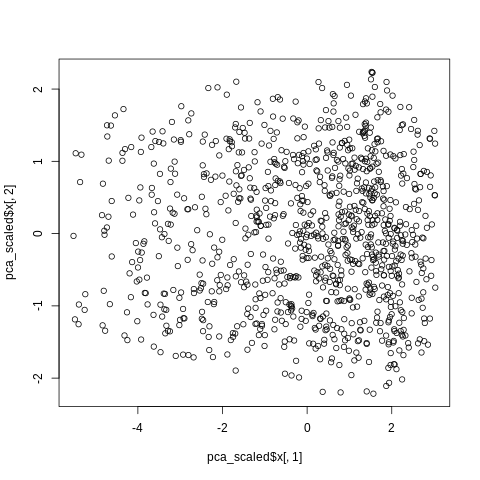

In [ ]:
%%R
#Even though currently our data has more than two dimensions, we can plot our graph using x. 
#Usually, the first few PCs capture maximum variance, hence PC1 and PC2 are plotted below 
#to understand the data.

pca_1_2 <- data.frame(pca_scaled$x[, 1:2])

plot(pca_scaled$x[,1], pca_scaled$x[,2])

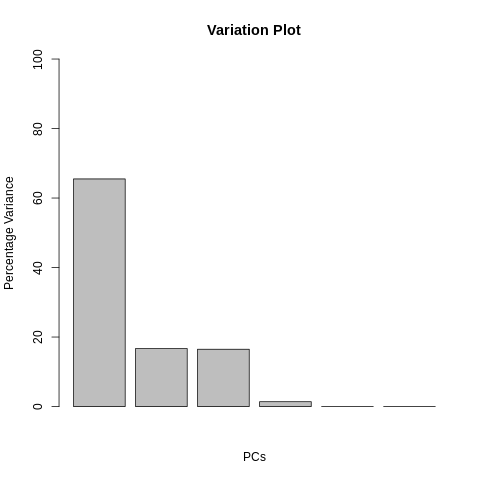

In [ ]:
%%R
#Here we use the square of sdev and calculate the percentage of variation each PC has.
pca_var <- pca_scaled$sdev^2
pca_var_perc <- round(pca_var/sum(pca_var) * 100, 1)
barplot(pca_var_perc, main = "Variation Plot", xlab = "PCs",
        ylab = "Percentage Variance", ylim = c(0, 100))

This barplot tells us that almost 65% of the variation in the data is shown by PC1, over 16% by PC2 and PC3. Very little is captured by the rest of the PCs.

### Using rotation

In [ ]:
%%R
# This part explains which of the features matter the most in separating the variables 
#   from each other; rotation assigns weights to the features (technically called loadings) 
#     and an array of ‘loadings’ for a PC is called an eigenvector.

PC1 <- pca_scaled$rotation[,1]
PC1_scores <- abs(PC1)
PC1_scores_ordered <- sort(PC1_scores, decreasing = TRUE)
names(PC1_scores_ordered)

[1] "Tax"          "cogs"         "gross.income" "Quantity"     "Unit.price"  
[6] "Rating"      


We see how the variable Tax  is the most important feature in differentiating between the brands while cogs is next and so on.

### Differentiating  using the two most important features

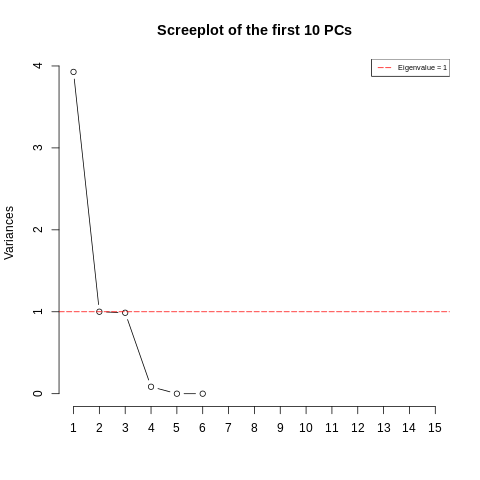

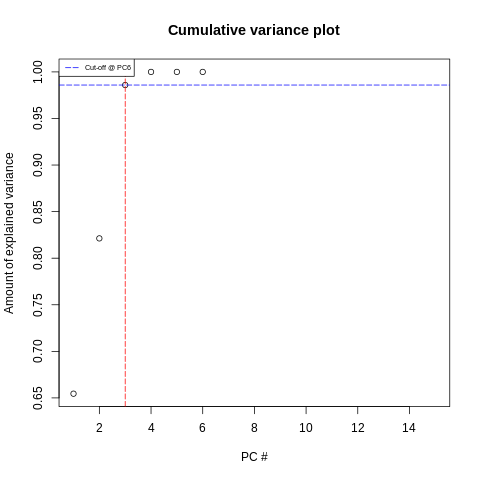

In [ ]:
%%R
#Finding the potimal number of PCA's to using using the variance
screeplot(pca_scaled, type = "l", npcs = 15, main = "Screeplot of the first 10 PCs")
abline(h = 1, col="red", lty=5)
legend("topright", legend=c("Eigenvalue = 1"),
       col=c("red"), lty=5, cex=0.6)

cumpro <- cumsum(pca_scaled$sdev^2 / sum(pca_scaled$sdev^2))
plot(cumpro[0:15], xlab = "PC #", ylab = "Amount of explained variance", main = "Cumulative variance plot")
abline(v = 3, col="red", lty=5)
abline(h = 0.9859, col="blue", lty=5)
legend("topleft", legend=c("Cut-off @ PC6"),
       col=c("blue"), lty=5, cex=0.6)

When deciding the PCA's to use in our analysis, we want to pick those whose variance is above 1. A variance lower than 1 means that the PCA accounts for les variance than the variable.

[Ref](https://towardsdatascience.com/principal-component-analysis-pca-101-using-r-361f4c53a9ff)


In [ ]:
%%R
# We will now plot our pca. This will provide us with some very useful insights i.e. 
# which cars are most similar to each other 
# ---
# 

# Installing our ggbiplot visualisation package
# 
library(devtools)
install_github("vqv/ggbiplot")
library(ggbiplot)

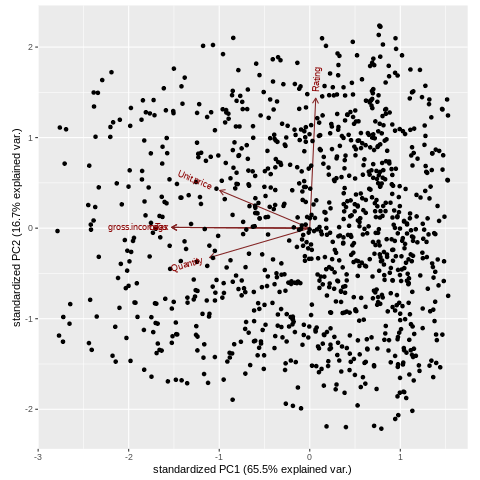

In [ ]:
%%R
# Then Loading our ggbiplot library
#  

ggbiplot(pca_scaled)

# From the graph we will see that the variables unit price, gross income and quantity
#contribute to PC1, with higher values in those variables moving the samples to the left on the plot.

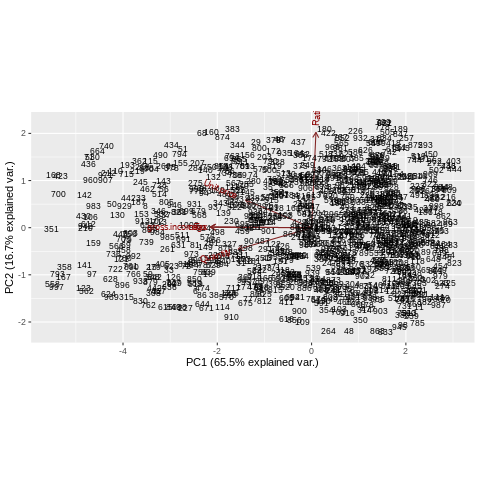

In [ ]:
%%R
# Adding more detail to the plot, we provide arguments rownames as labels

ggbiplot(pca_scaled, labels=rownames(num.col), obs.scale = 1, var.scale = 1,size = 80)


We notice is that the first 6 components has an Eigenvalue >1 and explains almost 90% of variance, this is great! We can effectively reduce dimensionality from 30 to 6 while only “loosing” about 10% of variance!

#  Feature Selection

## Filter Methods

In [ ]:
%%R
# Calculating the correlation matrix
# ---
#
correlationMatrix <- cor(market)
# Find attributes that are highly correlated
# ---
#
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)
# Highly correlated attributes
# ---
# 
highlyCorrelated

names(market[,highlyCorrelated])

[1] "Tax"  "cogs"


Tax and cogs are the highly correalted variables.

In [ ]:
%%R
# We can remove the variables with a higher correlation 
# and comparing the results graphically as shown below
# ---
# 
# Removing Redundant Features 
# ---
# 
Dataset2<-market[-highlyCorrelated]
head(Dataset2)

  Unit.price Quantity gross.income Rating
1      74.69        7      26.1415    9.1
2      15.28        5       3.8200    9.6
3      46.33        7      16.2155    7.4
4      58.22        8      23.2880    8.4
5      86.31        7      30.2085    5.3
6      85.39        7      29.8865    4.1


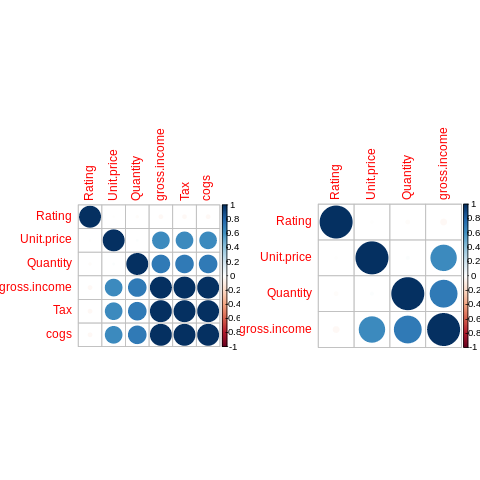

In [ ]:
%%R
# Performing our graphical comparison
# ---
# 
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(Dataset2), order = "hclust")

The filter method reduced the dimentions by droping the tax and cogs variables.

## Wrapper Methods

In [ ]:
%%R
install.packages("clustvarsel")
install.packages("mclust")

#Loading the libraries
library(clustvarsel)
library(mclust)

In [ ]:
%%R
# Sequential forward greedy search (default)
# ---
#
out = clustvarsel(num.col, G = 1:5)
out

In [ ]:
%%R
# The selection algorithm would indicate that the subset 
# we use for the clustering model is composed of variables X1 and X2 
# and that other variables should be rejected. 
# Having identified the variables that we use, we proceed to build the clustering model:
# ---
#

Subset1 = num.col[,out$subset]
mod = Mclust(Subset1, G = 1:5)
summary(mod

In [ ]:
%%R
plot(mod,c("classification")

## Embedded Methods

In [ ]:
%%R
#Embedded methods libraries
install.packages("wskm")
install.packages("cluster")

#
library(cluster)
library(wskm)

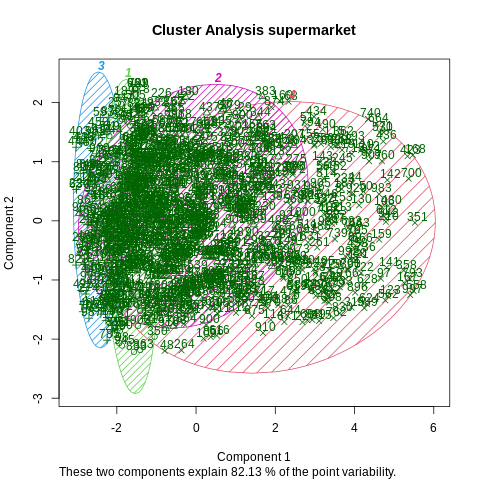

In [ ]:
%%R
# Cluster Plot against 1st 2 principal components
# ---
#
set.seed(2)
model <- ewkm(market, 4, lambda=3, maxiter=1000)

clusplot(market, model$cluster, color=TRUE, shade=TRUE,
         labels=2, lines=1,main='Cluster Analysis supermarket')

In [ ]:
%%R
# Weights are calculated for each variable and cluster. 
# They are a measure of the relative importance of each variable 
# with regards to the membership of the observations to that cluster. 
# The weights are incorporated into the distance function, 
# typically reducing the distance for more important variables.
# Weights remain stored in the model and we can check them as follows:
# 
round(model$weights*100,2)

  Unit.price Quantity Tax cogs gross.income Rating
1          0     0.00  50    0           50   0.00
2          0     0.00   0    0            0  99.99
3          0     0.00  50    0           50   0.00
4          0    99.99   0    0            0   0.00
5          0     0.00   0    0            0  99.99


The method applies the 1st and 2nd principal components which account for 82.12% of the point variability in the data. In the graph aabove its difficult to see the cluster separation.

 lookinn at the cluster weights we can see that in cluster 1&3 the most important features are tax and gross income, in cluster 2 rating is the most important feature with an inportance of 99.99% while in cluster 4 quantity is the most important feature.

# Association Analysis

Loading the data

In [ ]:
%%R
#setting up the enviroment
getwd()

#/content/Supermarket_Sales_Dataset II.csv
#locating the dataset /content/Supermarket_Dataset_1 - Sales Data.csv
setwd("//content")

#Loading the dataset
df <- read.csv("Supermarket_Sales_Dataset II.csv",TRUE,",")

## Previewing the data

In [ ]:
%%R
#Preview the top of the dataset
head(df)

             shrimp      almonds    avocado   vegetables.mix green.grapes
1           burgers    meatballs       eggs                              
2           chutney                                                      
3            turkey      avocado                                         
4     mineral water         milk energy bar whole wheat rice    green tea
5    low fat yogurt                                                      
6 whole wheat pasta french fries                                         
  whole.weat.flour yams cottage.cheese energy.drink tomato.juice low.fat.yogurt
1                                                                              
2                                                                              
3                                                                              
4                                                                              
5                                                                              
6 

In [ ]:
%%R
#Preview thr bottom of the dataset
tail(df)

       shrimp           almonds     avocado vegetables.mix green.grapes
7495 pancakes        light mayo                                        
7496   butter        light mayo fresh bread                            
7497  burgers frozen vegetables        eggs   french fries    magazines
7498  chicken                                                          
7499 escalope         green tea                                        
7500     eggs   frozen smoothie yogurt cake low fat yogurt             
     whole.weat.flour yams cottage.cheese energy.drink tomato.juice
7495                                                               
7496                                                               
7497        green tea                                              
7498                                                               
7499                                                               
7500                                                               
     low.fat.yogurt 

## Getting information about the dataset

Size of the dataset

In [ ]:
%%R
#Size  of the dataset
dim(df)

[1] 7500   20


The dataset has 1000 rows and 16 columns

In [ ]:
%%R
#Data types of the variavbles
sapply(df, class)

           shrimp           almonds           avocado    vegetables.mix 
      "character"       "character"       "character"       "character" 
     green.grapes  whole.weat.flour              yams    cottage.cheese 
      "character"       "character"       "character"       "character" 
     energy.drink      tomato.juice    low.fat.yogurt         green.tea 
      "character"       "character"       "character"       "character" 
            honey             salad     mineral.water            salmon 
      "character"       "character"       "character"       "character" 
antioxydant.juice   frozen.smoothie           spinach         olive.oil 
      "character"       "character"       "character"         "logical" 


In [ ]:
%%R
#Getting the number of unique values for each variable.
print(df %>% summarise_all(n_distinct))

  shrimp almonds avocado vegetables.mix green.grapes whole.weat.flour yams
1    115     118     116            115          111              107  103
  cottage.cheese energy.drink tomato.juice low.fat.yogurt green.tea honey salad
1             99           89           81             67        51    43    29
  mineral.water salmon antioxydant.juice frozen.smoothie spinach olive.oil
1            19      8                 3               3       3         1


The are no duplicayes in the dataset.

There are no mising values

In [ ]:
%%R

# Selecting the numeric data
num.col <- select_if(supermarket, is.numeric)

#shape of numerical data
dim(num.col)

[1] 1000    8


Frequency

In [ ]:
%%R
# We first we install the required arules library 
#
install.packages("arules")
# Loading the arules library
#
library(arules)

In [ ]:
%%R
#load the data
path <-"/content/Supermarket_Sales_Dataset II.csv"
Transactions<-read.transactions(path, sep = ",")

In [ ]:
%%R
# Verifying the object's class
# ---
# This should show us transactions as the type of data that we will need
# ---
# 
class(Transactions)

[1] "transactions"
attr(,"package")
[1] "arules"


In [ ]:
%%R
# Previewing our first 5 transactions
#
inspect(Transactions[1:5])

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 


In [ ]:
%%R
# If we wanted to preview the items that make up our dataset,
# alternatively we can do the following
# ---
# 
items<-as.data.frame(itemLabels(Transactions))
colnames(items) <- "Item"
head(items, 10)

                Item
1            almonds
2  antioxydant juice
3          asparagus
4            avocado
5        babies food
6              bacon
7     barbecue sauce
8          black tea
9        blueberries
10        body spray


In [ ]:
%%R
# Generating a summary of the transaction dataset
# ---
# This would give us some information such as the most purchased items, 
# distribution of the item sets (no. of items purchased in each transaction), etc.
# ---
# 
summary(Transactions)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus


mineral water, eggs, spaghetti, french fries, chocolate were the mmost popular items sold during the period.

In [ ]:
%%R
# Exploring the frequency of some articles 
# i.e. transacations ranging from 1 to 10 and performing 
# some operation in percentage terms of the total transactions 
# 
itemFrequency(Transactions[, 1:10],type = "absolute")
round(itemFrequency(Transactions[, 1:10],type = "relative")*100,2)

          almonds antioxydant juice         asparagus           avocado 
             2.04              0.89              0.48              3.33 
      babies food             bacon    barbecue sauce         black tea 
             0.45              0.87              1.08              1.43 
      blueberries        body spray 
             0.92              1.15 


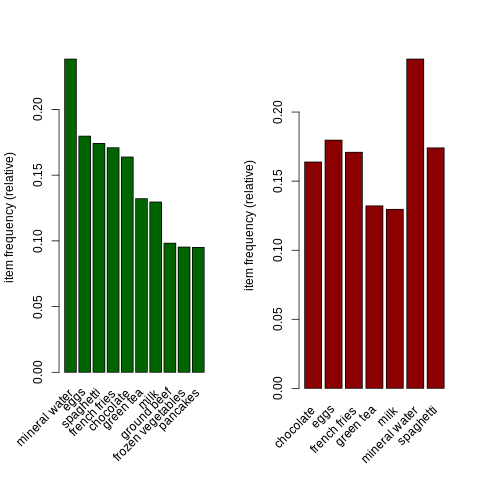

In [ ]:
%%R
# Producing a chart of frequencies and fitering 
# to consider only items with a minimum percentage 
# of support/ considering a top x of items
# ---
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))

# plot the frequency of items
itemFrequencyPlot(Transactions, topN = 10,col="darkgreen")
itemFrequencyPlot(Transactions, support = 0.1,col="darkred")

In [ ]:
%%R
# Building a model based on association rules 
# using the apriori function 
# ---
# We use Min Support as 0.001 and confidence as 0.8
# ---
# 
rules <- apriori (Transactions, parameter = list(supp = 0.001, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
set of 74 rules 


In [ ]:
%%R
# We use measures of significance and interest on the rules, 
# determining which ones are interesting and which to discard.
# ---
# However since we built the model using 0.001 Min support 
# and confidence as 0.8 we obtained 410 rules.
# However, in order to illustrate the sensitivity of the model to these two parameters, 
# we will see what happens if we increase the support or lower the confidence level
# 

# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (Transactions,parameter = list(supp = 0.002, conf = 0.8))
summary(rules2)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 done [0.02s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
set of 2 rules

rule length distribution (lhs + rhs):sizes
3 4 
1 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    3.25    3.50    3.50    3.75    4.00 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.002

In [ ]:
%%R
# Building apriori model with Min Support as 0.002 and confidence as 0.6.
rules3 <- apriori (Transactions, parameter = list(supp = 0.001, conf = 0.6)) 
rules3

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 done [0.04s].
writing ... [545 rule(s)] done [0.04s].
creating S4 object  ... done [0.01s].
set of 545 rules 


In our first example, we increased the minimum support of 0.001 to 0.002 and model rules went from 74 to only 2. This would lead us to understand that using a high level of support can make the model lose interesting rules. In the second example, we decreased the minimum confidence level to 0.6 and the number of model rules went from 74 to 545. This would mean that using a low confidence level increases the number of rules to quite an extent and many will not be useful.

In [ ]:
%%R
# We can perform an exploration of our model 
# through the use of the summary function as shown
# ---
# Upon running the code, the function would give us information about the model 
# i.e. the size of rules, depending on the items that contain these rules. 
# In our above case, most rules have 3 and 4 items though one rule had upto 6. 
# More statistical information such as support, lift and confidence is also provided.
# ---
# 
summary(rules)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
         data ntransactions support confidence
 Transactions          7501   0.001        0.8


In [ ]:
%%R
# Observing rules built in our model i.e. first 5 model rules
# ---
# 
inspect(rules[1:5])

# Interpretation of the first rule:

# ---

    lhs                             rhs             support     confidence
[1] {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
    coverage    lift      count
[1] 0.001199840  3.729058  8   
[2] 0.002133049  4.666587 13   
[3] 0.001466471  3.432428  9   
[4] 0.001866418  3.595877 12   
[5] 0.002666311 11.976387 19   


Interpretation of the first rule:

    If a customer buys frozen smoothie,spinach theres is a 89% chance that ther will also purchase mineral water.

    If they buy bacon and pancakes there is an 81.25% chance that they will purchase spaghetti.

In [ ]:
%%R
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
# We can also use different criteria such as: (by = "lift" or by = "support")
# 
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

# Interpretation
# ---
# The given five rules have a confidence of 100
# ---

    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


Interpretation
The given first four  rules have a confidence of 100%.

In [ ]:
%%R
# If we're interested in making a promotion relating to the sale of milk, 
# we could create a subset of rules concerning these products 
# ---
# This would tell us the items that the customers bought before purchasing milk
# ---
# 
milk <- subset(rules, subset = rhs %pin% "milk")
 
# Then order by confidence
milk<-sort(milk, by="confidence", decreasing=TRUE)
inspect(milk[1:5])

    lhs                                  rhs    support     confidence
[1] {cake,meatballs,mineral water}    => {milk} 0.001066524 1.0000000 
[2] {escalope,hot dogs,mineral water} => {milk} 0.001066524 0.8888889 
[3] {meatballs,whole wheat pasta}     => {milk} 0.001333156 0.8333333 
[4] {black tea,frozen smoothie}       => {milk} 0.001199840 0.8181818 
[5] {burgers,ground beef,olive oil}   => {milk} 0.001066524 0.8000000 
    coverage    lift     count
[1] 0.001066524 7.717078  8   
[2] 0.001199840 6.859625  8   
[3] 0.001599787 6.430898 10   
[4] 0.001466471 6.313973  9   
[5] 0.001333156 6.173663  8   


The items that the customers bought before purchasing milk include things like cake,meatballs,mineral water with 100% confidence according to rule 1, escalope,hot dogs,mineral water with 89% confidence according to rule 2 and so on.

In [ ]:
%%R
# What if we wanted to determine items that customers might buy 
# who have previously bought milk?
# ---
# 
# Subset the rules
milk <- subset(rules, subset = lhs %pin% "milk")

# Order by confidence
milk<-sort(milk, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(milk[1:5])

    lhs                    rhs                     support confidence    coverage     lift count
[1] {frozen vegetables,                                                                         
     milk,                                                                                      
     spaghetti,                                                                                 
     turkey}            => {mineral water}     0.001199840  0.9000000 0.001333156 3.775671     9
[2] {cake,                                                                                      
     meatballs,                                                                                 
     milk}              => {mineral water}     0.001066524  0.8888889 0.001199840 3.729058     8
[3] {burgers,                                                                                   
     milk,                                                                                      
     salmon}            => {sp

Items that customers might buy who have previously bought milk are mineral water, spaghetti, and french fries.

In [ ]:
%%R
# What if we wanted to determine items that customers might buy 
# who have previously bought mineral water?
# ---
# 
# Subset the rules
water <- subset(rules, subset = lhs %pin% "mineral water")

# Order by confidence
water<-sort(water, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(water[1:5])

    lhs                                   rhs           support     confidence
[1] {cake,meatballs,mineral water}     => {milk}        0.001066524 1.0000000 
[2] {eggs,mineral water,pasta}         => {shrimp}      0.001333156 0.9090909 
[3] {herb & pepper,mineral water,rice} => {ground beef} 0.001333156 0.9090909 
[4] {light cream,mineral water,shrimp} => {spaghetti}   0.001066524 0.8888889 
[5] {grated cheese,mineral water,rice} => {ground beef} 0.001066524 0.8888889 
    coverage    lift      count
[1] 0.001066524  7.717078  8   
[2] 0.001466471 12.722185 10   
[3] 0.001466471  9.252498 10   
[4] 0.001199840  5.105326  8   
[5] 0.001199840  9.046887  8   


# Anomaly Detection

In [ ]:
%%R
# Installing anomalize package
# ---
# 
install.packages("anomalize")

In [ ]:
%%R
# Load tidyverse and anomalize
# ---
# 
library(tidyverse)
library(anomalize)

In [ ]:
%%R
# Collect our time series data
# ---
# /content/Supermarket_Sales_Forecasting - Sales.csv
#Loading the dataset
ts <- read.csv("Supermarket_Sales_Forecasting - Sales.csv",TRUE,",")
head(ts)

       Date    Sales
1  1/5/2019 548.9715
2  3/8/2019  80.2200
3  3/3/2019 340.5255
4 1/27/2019 489.0480
5  2/8/2019 634.3785
6 3/25/2019 627.6165


In [ ]:
%%R
#Hence we have to convert the dataframe btc into a tibble object  %>% select(-one_of('Date'))
tib_ts <- df2 %>% rownames_to_column() %>% as.tibble() %>% 
  mutate(date = as.Date(Date, "%m/%d/%y"))%>% select(-one_of('Date'))
#tib_ts$rowname  <- NULL 
#preview the tibble
head(tib_ts)

# A tibble: 6 × 3
  rowname Sales date      
  <chr>   <dbl> <date>    
1 1       549.  2020-01-05
2 2        80.2 2020-03-08
3 3       341.  2020-03-03
4 4       489.  2020-01-27
5 5       634.  2020-02-08
6 6       628.  2020-03-25


R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: frequency = 5 weeks

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: trend = 47 weeks



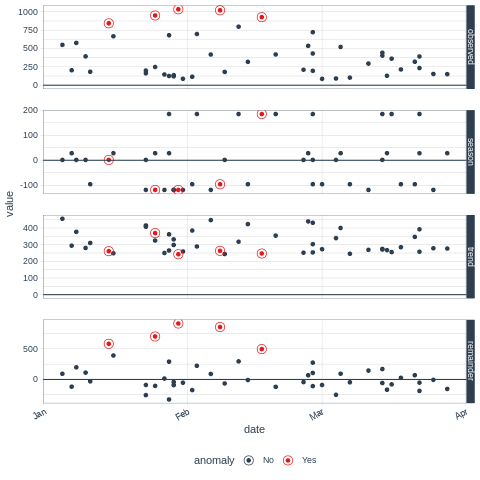

In [ ]:
%%R

library(tibbletime)
x <- as_tbl_time(tib_ts, index = date)

x %>% 
  as_period("daily")%>% 
  #Time Series Decomposition where the Time series data is decomposed 
  # into Seasonal, Trend and remainder components using the time_decompose() function.
  time_decompose(Sales, method = "stl", frequency = "auto", trend = "auto") %>%
  #anomalize can detect and flag anomalies in the decomposed data 
  anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.2) %>%
  # Visualize the outcome.
  plot_anomaly_decomposition()

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: frequency = 5 weeks

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: trend = 47 weeks



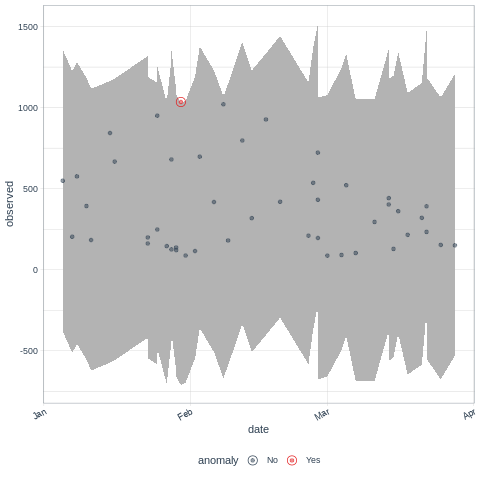

In [ ]:
%%R
# Anomaly Detection
x %>% 
  as_period("daily")%>% 
  time_decompose(Sales) %>%
  anomalize(remainder) %>%
  time_recompose() %>%
  plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)
  

Ther is an anomly in the upper bound just before Feb.

# Conclusion

Branch A is more popular for men while branch C is more popular among females.

Electronics and fashion accessories were the top selling categories.

Mineral water is the was the top selling product. A person who previously bouth milk is 100% llikely to buy milk and 90.9% likely to buy ground beef and shrimp.

From the combination of Principal component analysis and filter feature selection technique we can conclude that the most important featureas are quantity, gross income, and unit price.

There were no significant anomalies during the period under investigation.